In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
from matplotlib import style

## Loading orignal data

In [5]:
df = pd.read_csv("vehicles.csv")

In [6]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
print(df.isnull().sum())

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64


In [8]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [10]:
# Drop columns that is not needed (Please select whatever columns we would not need)
df_columns = df.drop(columns=['url','region_url','VIN','paint_color','image_url','description','county','lat','long','posting_date'])

In [11]:
# Remove rows with NA data
df_columns_drop = df_columns.dropna()

In [12]:
df_columns_drop

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8 cylinders,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6 cylinders,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8 cylinders,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8 cylinders,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8 cylinders,gas,130000.0,lien,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8 cylinders,gas,114400.0,clean,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6 cylinders,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8 cylinders,gas,69550.0,clean,automatic,rwd,compact,convertible,wy


In [13]:
# Check 'cylinders' column
cylinders_count = df_columns_drop.cylinders.value_counts()
cylinders_count

6 cylinders     28062
4 cylinders     27056
8 cylinders     24931
10 cylinders      802
5 cylinders       738
other             257
3 cylinders       162
12 cylinders       43
Name: cylinders, dtype: int64

In [14]:
# Preprocess 'cylinders' column - Remove 'cylinders'
df_columns_drop['cylinders'] = df_columns_drop['cylinders'].str.replace(' cylinders','')

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Preprocess 'cylinders' column - Remove 'other'
df_columns_drop['cylinders'] = df_columns_drop['cylinders'].str.replace('other','0')

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
# Assign data type
df_columns_drop['cylinders'].astype('float64')

31        6.0
55        8.0
59        6.0
65        8.0
73        8.0
         ... 
426808    8.0
426809    8.0
426831    6.0
426833    8.0
426836    6.0
Name: cylinders, Length: 82051, dtype: float64

In [17]:
# Check 'cylinders' column
cylinders_count = df_columns_drop.cylinders.value_counts()
cylinders_count

6     28062
4     27056
8     24931
10      802
5       738
0       257
3       162
12       43
Name: cylinders, dtype: int64

In [18]:
df_columns_drop

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013.0,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004.0,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012.0,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001.0,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017.0,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426808,7302963673,wyoming,18000,2005.0,chevrolet,silverado 1500 lt 4x4,excellent,8,gas,130000.0,lien,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990.0,jeep,gand wagoneer,good,8,gas,114400.0,clean,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985.0,nissan,300zx coupe with t-tops,like new,6,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,wy
426833,7302338378,wyoming,6800,1997.0,jaguar,xk8 convertible,good,8,gas,69550.0,clean,automatic,rwd,compact,convertible,wy


In [19]:
# removing decimal from year column
df_columns_drop['year'] = (df_columns_drop['year']).astype(int) 

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
df_columns_drop.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al


In [21]:
# normal = np.random.normal(0, 1, 10000) # loc, scale, size
# quartiles = pd.ucs_df(normal).quantile([0.25, 0.5, 0.75, 1])[0]
# fig, axs = plt.subplots(nrows=2)
# fig.set_size_inches(14, 8)
# # Boxplot of Normal distribution
# plot1 = sns.boxplot(normal, ax=axs[0])
# plot1.set(xlim=(-4, 4))
# # Normal distribution
# plot2 = sns.distplot(normal, ax=axs[1])
# plot2.set(xlim=(-4, 4))
# # Median line
# plt.axvline(np.median(normal), color='r', linestyle='dashed', linewidth=2)
# for i, q in enumerate(quartiles):
#     # Quartile i line
#     plt.axvline(q, color='g', linestyle='dotted', linewidth=2)

In [68]:
df_columns_drop["state"].unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [69]:
#changing from states to regions
df_columns_drop=df_columns_drop.replace(to_replace=['ca','or','wa','hi','ak','nv','id','mt','wy','ut','co','az','nm'], value='west')
df_columns_drop=df_columns_drop.replace(to_replace=['nd','sd','ne','ks','mn','ia','mo','wi','il','mi','in','oh'], value='midwest')
df_columns_drop=df_columns_drop.replace(to_replace=['pa','ny','vt','me','nh','ma','ct','ri','nj'], value='northeast')
df_columns_drop=df_columns_drop.replace(to_replace=['tx','ok','ar','la','ky','tn','ms','al','de','md','dc','wv','va','nc','sc','ga','fl'], value='south')

### finding Outliers

<AxesSubplot:xlabel='state', ylabel='price'>

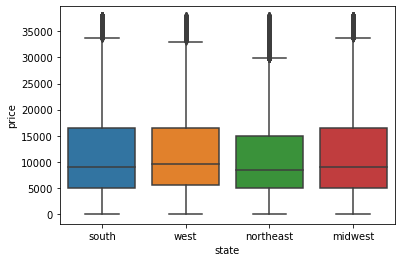

In [70]:
sns.boxplot(data=df_columns_drop, x="state", y="price")

<AxesSubplot:xlabel='odometer', ylabel='price'>

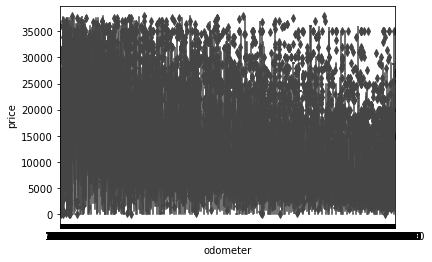

In [71]:
sns.boxplot(data=df_columns_drop, x="odometer", y="price")

## Price vs State

In [86]:
fuel = df_columns_drop["fuel"]
price = df_columns_drop["price"]
transmission = df_columns_drop["transmission"]
year = df_columns_drop["year"]
odometer = df_columns_drop ["odometer"]

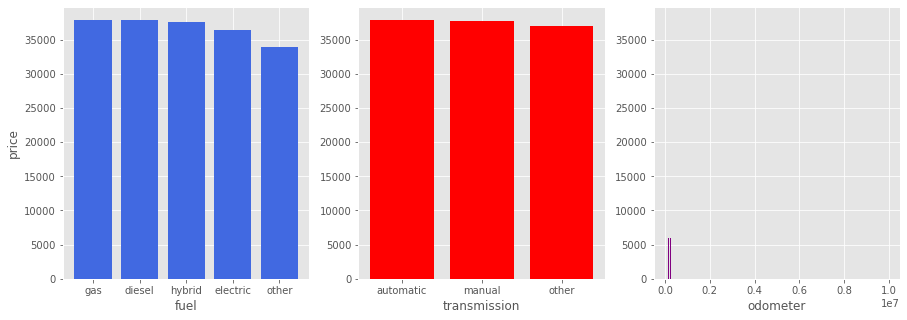

In [87]:
## Data Visualization
plt.style.use("ggplot")
fig = plt.figure(figsize = (15, 5))
ax2 = plt.axes()
#fig.subtitle("Visualizing categorical data columns")
plt.subplot(1,3,1)
plt.bar(fuel,price, color= "royalblue")
plt.xlabel("fuel")
plt.ylabel("price")
plt.subplot(1,3,2)
plt.bar(transmission,price, color= "red")
plt.xlabel("transmission")

plt.subplot(1,3,3)
plt.bar(odometer,price, color= "purple")
plt.xlabel("odometer")

plt.show()

In [26]:
lower_limit = np.percentile(df_columns_drop[['price']], 5)
upper_limit = np.percentile(df_columns_drop[['price']], 95)
print(lower_limit, upper_limit)

1.0 37900.0


In [27]:
df_columns_drop = df_columns_drop[(df_columns_drop['price'] >= lower_limit) & (df_columns_drop['price'] <= upper_limit)]  #Removing outliers
df_columns_drop

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,clean,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004,ford,f250 super duty,good,8,diesel,88000.0,clean,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,clean,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001,ford,f450,good,8,diesel,144700.0,clean,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,rebuilt,automatic,rwd,mid-size,sedan,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,7303112347,wyoming,15999,2018,chevrolet,"cruze, lt",excellent,4,gas,36465.0,clean,automatic,fwd,mid-size,sedan,wy
426808,7302963673,wyoming,18000,2005,chevrolet,silverado 1500 lt 4x4,excellent,8,gas,130000.0,lien,automatic,4wd,full-size,truck,wy
426809,7302963273,wyoming,18000,1990,jeep,gand wagoneer,good,8,gas,114400.0,clean,automatic,4wd,full-size,SUV,wy
426831,7302384818,wyoming,9800,1985,nissan,300zx coupe with t-tops,like new,6,gas,115000.0,clean,automatic,rwd,sub-compact,hatchback,wy


In [28]:
label_encoder = preprocessing.LabelEncoder()
df_columns_drop['title_status'] = label_encoder.fit_transform(df_columns_drop['title_status'])

C:\Users\shahl\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [29]:
df_columns_drop.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,state
31,7316356412,auburn,15000,2013,ford,f-150 xlt,excellent,6,gas,128000.0,0,automatic,rwd,full-size,truck,al
55,7314560853,auburn,19900,2004,ford,f250 super duty,good,8,diesel,88000.0,0,automatic,4wd,full-size,pickup,al
59,7313406529,auburn,14000,2012,honda,odyssey,excellent,6,gas,95000.0,0,automatic,fwd,full-size,mini-van,al
65,7312847466,auburn,22500,2001,ford,f450,good,8,diesel,144700.0,0,manual,rwd,full-size,truck,al
73,7312144944,auburn,15000,2017,dodge,charger rt 4dr sedan,excellent,8,gas,90000.0,4,automatic,rwd,mid-size,sedan,al


In [79]:
df =df_columns_drop 

In [80]:
# perform data transformation
for col in df.columns[1:]:
    attName = col
    dType = df[col].dtype
    missing = pd.isnull(df[col]).any()
    uniqueCount = len(df[attName].value_counts(normalize=False))
# discretize (create dummies)
    if dType == object:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
        del df[attName]

In [81]:
df

,id,price,year,odometer,title_status,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,...,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_midwest,state_northeast,state_south,state_west
31,7316356412,15000,2013,128000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
55,7314560853,19900,2004,88000.0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
59,7313406529,14000,2012,95000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
65,7312847466,22500,2001,144700.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
73,7312144944,15000,2017,90000.0,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426793,7303112347,15999,2018,36465.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
426808,7302963673,18000,2005,130000.0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426809,7302963273,18000,1990,114400.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426831,7302384818,9800,1985,115000.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## DecisionTreeRegressor

In [30]:
# Select columns for analysis
df_test = df_columns_drop.loc[:,['price','cylinders','odometer']]

In [31]:
df_test

,price,cylinders,odometer
31,15000,6,128000.0
55,19900,8,88000.0
59,14000,6,95000.0
65,22500,8,144700.0
73,15000,8,90000.0
...,...,...,...
426793,15999,4,36465.0
426808,18000,8,130000.0
426809,18000,8,114400.0
426831,9800,6,115000.0


In [32]:
# Create features and target
X = df_test.copy().drop('price',axis=1)
y = df_test['price']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [34]:
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [35]:
# Create model
regr = DecisionTreeRegressor()

In [36]:

# Fit model
regr.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
# Make prediction
y_pred = regr.predict(X_test)

In [38]:
# Result of prediction
data = {'price': y_test,
       'prediction': y_pred}
df_pred = pd.DataFrame(data)

In [39]:
df_pred

,price,prediction
27642,4999,4999.000000
319688,14500,15466.000000
421227,22750,13612.500000
269094,15400,10115.523810
296328,14900,14900.000000
...,...,...
106021,32500,32500.000000
368185,7500,12341.526316
305923,13988,7999.000000
387393,4800,11169.277778


In [40]:
# R squared Error
error_score = metrics.r2_score(y_test, y_pred)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.3720924567217134


In [73]:
error_score = metrics.score(y_test, y_pred)
print("R Squared Error_score : ",error_score)

AttributeError: module 'sklearn.metrics' has no attribute 'score'

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns

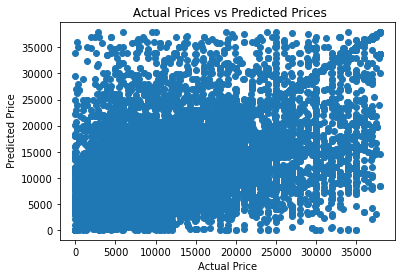

In [42]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [43]:
# df_columns_drop.to_csv("vehicles_processed.csv")

## Linear Regression Model

In [44]:
# Select columns for analysis
df_test2 = df_columns_drop.loc[:,['price','year','odometer','title_status']]
df_test2

,price,year,odometer,title_status
31,15000,2013,128000.0,0
55,19900,2004,88000.0,0
59,14000,2012,95000.0,0
65,22500,2001,144700.0,0
73,15000,2017,90000.0,4
...,...,...,...,...
426793,15999,2018,36465.0,0
426808,18000,2005,130000.0,1
426809,18000,1990,114400.0,0
426831,9800,1985,115000.0,0



### Split the Data into Training and Target

In [45]:
# Create our features
X = df_test2
X=X.drop(["price"],axis=1)
X=pd.get_dummies(X)


# Create our target
y = df_test2["price"]

In [46]:
X

,year,odometer,title_status
31,2013,128000.0,0
55,2004,88000.0,0
59,2012,95000.0,0
65,2001,144700.0,0
73,2017,90000.0,4
...,...,...,...
426793,2018,36465.0,0
426808,2005,130000.0,1
426809,1990,114400.0,0
426831,1985,115000.0,0


In [47]:
y

31        15000
55        19900
59        14000
65        22500
73        15000
          ...  
426793    15999
426808    18000
426809    18000
426831     9800
426833     6800
Name: price, Length: 74200, dtype: int64

### Split the Data into Training and Testing 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2)

### Model Traing

In [49]:
# Loadinf the Linear Regression model
lin_reg_model = LinearRegression()

In [50]:
#fitting data to the linear Regression model
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

In [51]:
# prediction on Training data
y_prediction = lin_reg_model.predict(X_train)

In [52]:
# Checking Accuracy
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.07362152015245316


In [74]:
from sklearn.metrics import mean_squared_error, r2_score


In [75]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_prediction),
                mean_squared_error(y_test, test_data_prediction)))


MSE train: 68904092.712, test: 69665829.047


In [78]:
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_prediction),
                r2_score(y_test, test_data_prediction)))


R^2 train: 0.074, test: 0.080


### Visualize the Actual and Predicted prices

In [53]:
X_train.shape

(55650, 3)

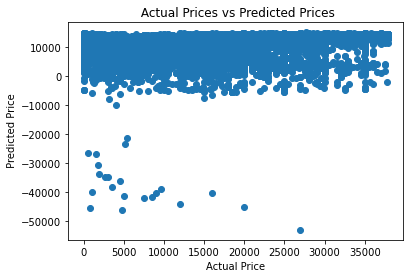

In [54]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [55]:
# prediction on Testing data
test_data_prediction = lin_reg_model.predict(X_test)

In [56]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.08044476106932097


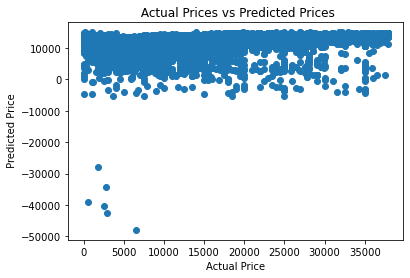

In [57]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [58]:
# # Result of prediction
# data = {'price': y_test,
#        'prediction': y_prediction}
# df_pred = pd.DataFrame(data)

In [59]:
# Loadinf the Lasso Regression model
lass_reg_model = Lasso()

In [60]:
#fitting data to the linear Regression model
lass_reg_model.fit(X_train, y_train)

Lasso()

In [61]:
# prediction on Training data
y_prediction = lass_reg_model.predict(X_train)

In [62]:
# R squared Error
error_score = metrics.r2_score(y_train, y_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.07362150506560683


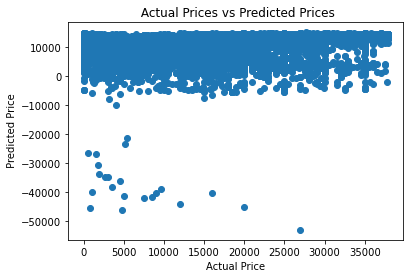

In [63]:
plt.scatter(y_train,y_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [64]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)

In [65]:
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R Squared Error_score : ",error_score)

R Squared Error_score :  0.08044318232869618


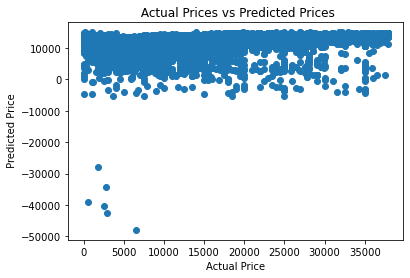

In [66]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel(" Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [67]:
# # Result of prediction
# data = {'price': y_test,
#        'prediction': y_prediction}
# df_pred = pd.DataFrame(data)